In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.integrate import odeint
import math

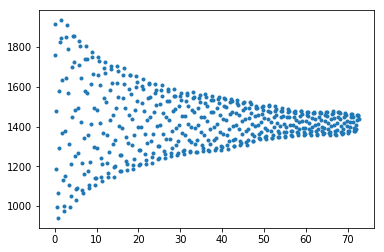

In [63]:
my_data = np.genfromtxt('pendulum_data.csv', delimiter=',')
time = my_data[:,0]
position = my_data[:,1]

# set first time entry to at t=0
time = time - time[0]
plt.plot(time, position, '.')

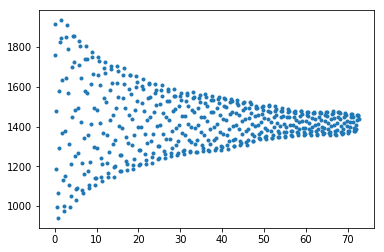

In [95]:
a = 1422
b = 489.1
c = 0.03622
d = 4.166
e = 1.908

def fitfunc(t, a, b, c, d, e):
    return a + b*np.exp(-c*t) * np.sin(d*t+e)


# plt.plot(time, fitfunc(time, a, b, c, d, e))
plt.plot(time, position, '.')

[1.42170236e+03 4.89129752e+02 3.62210709e-02 4.16601620e+00
 1.90781040e+00]


Text(0,0.5,'reflection time (us)')

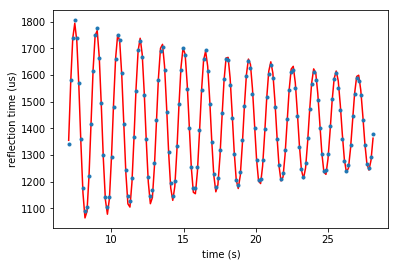

In [94]:
bound1 = [0, 0, 0, 0, 1.5]
bound2 = [100000, 10000, 1, 5, 2]

popt, pcov = curve_fit(fitfunc, time, position, bounds=(bound1, bound2))
print(popt)

l = 50
r = 200
plt.plot(time[l:r], fitfunc(time[l:r], *popt), 'r-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f, e=%5.3f' % tuple(popt))
plt.plot(time[l:r], position[l:r], '.')
plt.xlabel('time (s)')
plt.ylabel('reflection time (us)')